## INSOFE Mid-Term Hackathon: July 2018


**Import libraries**
====================

In [331]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
sns.set(font_scale=1)

**Load train & test data**
====================

In [332]:
dataset=pd.read_csv("dataset.csv")
dataset.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,RowID,Joblevel,DistancetoHome,istrain,FrequencyofTravel,Gender,OfficeAmbienceRating,MonthlyRate,YearsSinceLastPromotion,SelfMotivationRating,...,ExtraTime,FirstJobDate,EmployeeID,Happynesslevelinjob,DateOfjoiningintheCurrentCompany,ESOps,MonthlyIncome,Specialization,PerformanceRating,MaritalStatus
0,1,1,3,1,Less,Female,3,9964,0,4,...,No,7/27/2002,10,1,5/29/2013,3,2670,Medical,4,Married
1,2,2,15,1,Less,Female,4,12682,0,2,...,No,5/25/2004,15,3,4/21/2005,0,4193,Life Sciences,3,Single
2,3,1,24,1,Less,Male,3,12947,0,2,...,No,4/22/2008,19,3,4/28/2010,0,2028,Life Sciences,3,Single
3,4,1,5,1,Less,Male,1,15053,0,4,...,Yes,6/22/2007,21,2,7/30/2008,2,3298,Life Sciences,3,Divorced
4,5,1,2,1,Less,Male,4,4306,1,3,...,No,7/26/2008,24,4,6/21/2011,0,3944,Life Sciences,3,Single


In [333]:
train = dataset[dataset['istrain'] == 1]
print(dataset.shape)
print(train.shape)
target = train['ExtraTime']
train = train.drop(['istrain','ExtraTime'], axis=1)
train['ExtraTime'] = target
print(train.shape)
train.head()

(50341, 36)
(40303, 36)
(40303, 35)


,RowID,Joblevel,DistancetoHome,FrequencyofTravel,Gender,OfficeAmbienceRating,MonthlyRate,YearsSinceLastPromotion,SelfMotivationRating,Division,...,FirstJobDate,EmployeeID,Happynesslevelinjob,DateOfjoiningintheCurrentCompany,ESOps,MonthlyIncome,Specialization,PerformanceRating,MaritalStatus,ExtraTime
0,1,1,3,Less,Female,3,9964,0,4,Research & Development,...,7/27/2002,10,1,5/29/2013,3,2670,Medical,4,Married,No
1,2,2,15,Less,Female,4,12682,0,2,Research & Development,...,5/25/2004,15,3,4/21/2005,0,4193,Life Sciences,3,Single,No
2,3,1,24,Less,Male,3,12947,0,2,Research & Development,...,4/22/2008,19,3,4/28/2010,0,2028,Life Sciences,3,Single,No
3,4,1,5,Less,Male,1,15053,0,4,Research & Development,...,6/22/2007,21,2,7/30/2008,2,3298,Life Sciences,3,Divorced,Yes
4,5,1,2,Less,Male,4,4306,1,3,Research & Development,...,7/26/2008,24,4,6/21/2011,0,3944,Life Sciences,3,Single,No


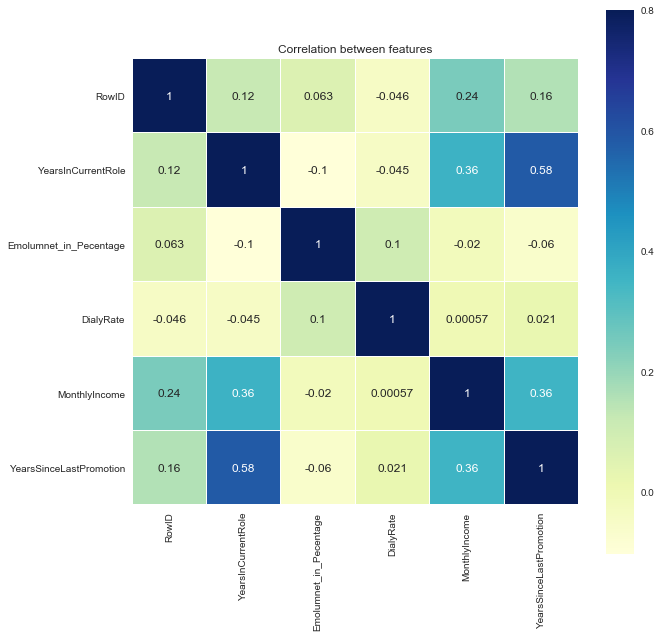

In [334]:
corr=train[['RowID', 'YearsInCurrentRole', 'Emolumnet_in_Pecentage', 'DialyRate' , 'MonthlyIncome','YearsSinceLastPromotion',
            'Gender', 'Division', 'MaritalStatus','JobRole', 'Specialization',
            'ExtraTime']].corr()#["Survived"]
plt.figure(figsize=(10, 10))

sns.heatmap(corr, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='YlGnBu',linecolor="white")
plt.title('Correlation between features');

In [335]:
test = dataset[dataset['istrain'] != 1]
print(dataset.shape)
print(test.shape)
print(train.shape)
test = test.drop(['istrain','ExtraTime'], axis=1)
print(test.shape)
test_id = test['RowID']
test.head()


(50341, 36)
(10038, 36)
(40303, 35)
(10038, 34)


,RowID,Joblevel,DistancetoHome,FrequencyofTravel,Gender,OfficeAmbienceRating,MonthlyRate,YearsSinceLastPromotion,SelfMotivationRating,Division,...,StandardHours,FirstJobDate,EmployeeID,Happynesslevelinjob,DateOfjoiningintheCurrentCompany,ESOps,MonthlyIncome,Specialization,PerformanceRating,MaritalStatus
40303,40304,2,1,Less,Female,2,19479,0,3,Sales,...,80,4/22/2006,1,4,7/25/2008,0,5993,Life Sciences,3,Single
40304,40305,1,2,Less,Male,4,2396,0,2,Research & Development,...,80,6/26/2007,4,3,7/22/2014,0,2090,Other,3,Single
40305,40306,2,10,Less,Male,4,19121,1,3,Research & Development,...,80,6/25/2005,40,4,7/30/2010,0,6465,Other,3,Married
40306,40307,1,1,Less,Male,2,3020,2,3,Research & Development,...,80,4/29/2008,45,4,4/29/2012,1,2293,Medical,3,Married
40307,40308,1,3,Less,Male,1,3810,0,2,Sales,...,80,5/23/2011,47,3,7/30/2011,0,2683,Marketing,3,Married


# Exploratory Data Analysis & Data Cleaning

In [336]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40303 entries, 0 to 40302
Data columns (total 35 columns):
RowID                               40303 non-null int64
Joblevel                            40303 non-null int64
DistancetoHome                      40303 non-null int64
FrequencyofTravel                   40303 non-null object
Gender                              40303 non-null object
OfficeAmbienceRating                40303 non-null int64
MonthlyRate                         40303 non-null int64
YearsSinceLastPromotion             40303 non-null int64
SelfMotivationRating                40303 non-null int64
Division                            40303 non-null object
Over18                              40303 non-null object
Hourlyrate                          40303 non-null int64
JobRole                             40303 non-null object
RelationshipSatisfaction            40303 non-null int64
Education                           40303 non-null int64
No.ofWorkshopsAttended         

In [337]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10038 entries, 40303 to 50340
Data columns (total 34 columns):
RowID                               10038 non-null int64
Joblevel                            10038 non-null int64
DistancetoHome                      10038 non-null int64
FrequencyofTravel                   10038 non-null object
Gender                              10038 non-null object
OfficeAmbienceRating                10038 non-null int64
MonthlyRate                         10038 non-null int64
YearsSinceLastPromotion             10038 non-null int64
SelfMotivationRating                10038 non-null int64
Division                            10038 non-null object
Over18                              10038 non-null object
Hourlyrate                          10038 non-null int64
JobRole                             10038 non-null object
RelationshipSatisfaction            10038 non-null int64
Education                           10038 non-null int64
No.ofWorkshopsAttended     

In [338]:
train.dtypes.value_counts()

int64     24
object    11
dtype: int64

In [339]:
test.dtypes.value_counts()

int64     24
object    10
dtype: int64

In [340]:
train.describe()

,RowID,Joblevel,DistancetoHome,OfficeAmbienceRating,MonthlyRate,YearsSinceLastPromotion,SelfMotivationRating,Hourlyrate,RelationshipSatisfaction,Education,...,NumberofCompaniesChanged,WorkLifeBalance,Emolumnet_in_Pecentage,DialyRate,StandardHours,EmployeeID,Happynesslevelinjob,ESOps,MonthlyIncome,PerformanceRating
count,40303.000000,40303.000000,40303.000000,40303.000000,40303.000000,40303.000000,40303.000000,40303.000000,40303.000000,40303.000000,...,40303.000000,40303.000000,40303.000000,40303.000000,40303.0,40303.000000,40303.000000,40303.000000,40303.000000,40303.000000
mean,20152.000000,1.906756,9.309381,2.896087,13692.054438,1.781083,2.684217,66.199191,2.584621,2.877230,...,3.046076,2.771903,15.148376,807.493139,80.0,797.511823,2.714488,0.725876,5860.093020,3.161750
std,11634.618286,1.045247,7.705785,1.029788,6545.687326,2.813922,0.714421,18.317357,1.023896,0.933772,...,2.388288,0.653246,3.268556,415.296257,0.0,624.371871,0.980703,0.857401,4347.941409,0.368226
min,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,1.000000,30.000000,1.000000,1.000000,...,0.000000,1.000000,11.000000,103.000000,80.0,2.000000,1.000000,0.000000,1074.000000,3.000000
25%,10076.500000,1.000000,3.000000,2.000000,8744.000000,0.000000,2.000000,51.000000,2.000000,2.000000,...,1.000000,2.000000,13.000000,444.000000,80.0,235.000000,2.000000,0.000000,2823.000000,3.000000
50%,20152.000000,2.000000,7.000000,3.000000,13077.000000,1.000000,3.000000,65.000000,3.000000,3.000000,...,3.000000,3.000000,14.000000,819.000000,80.0,652.000000,3.000000,1.000000,4287.000000,3.000000
75%,30227.500000,2.000000,14.000000,4.000000,19001.500000,2.000000,3.000000,82.000000,3.000000,4.000000,...,5.000000,3.000000,17.000000,1187.000000,80.0,1301.000000,3.000000,1.000000,6852.000000,3.000000
max,40303.000000,5.000000,29.000000,4.000000,26968.000000,15.000000,4.000000,100.000000,4.000000,5.000000,...,9.000000,4.000000,25.000000,1499.000000,80.0,2068.000000,4.000000,3.000000,19999.000000,4.000000


In [341]:
print(train.columns)
print(train.dtypes.value_counts())
print('object:', train.select_dtypes('object').columns)
print('int64:', train.select_dtypes('int64').columns)
print('float64:', train.select_dtypes('float64').columns)

Index(['RowID', 'Joblevel', 'DistancetoHome', 'FrequencyofTravel', 'Gender',
       'OfficeAmbienceRating', 'MonthlyRate', 'YearsSinceLastPromotion',
       'SelfMotivationRating', 'Division', 'Over18', 'Hourlyrate', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'EmployeeCount', 'datacollected', 'Age', 'YearsInCurrentRole',
       'NumberofCompaniesChanged', 'WorkLifeBalance', 'Emolumnet_in_Pecentage',
       'DialyRate', 'StandardHours', 'FirstJobDate', 'EmployeeID',
       'Happynesslevelinjob', 'DateOfjoiningintheCurrentCompany', 'ESOps',
       'MonthlyIncome', 'Specialization', 'PerformanceRating', 'MaritalStatus',
       'ExtraTime'],
      dtype='object')
int64     24
object    11
dtype: int64
object: Index(['FrequencyofTravel', 'Gender', 'Division', 'Over18', 'JobRole',
       'datacollected', 'FirstJobDate', 'DateOfjoiningintheCurrentCompany',
       'Specialization', 'MaritalStatus', 'ExtraTime'],
      dtype='object')
int64: Inde

In [342]:
train.columns[train.apply(lambda x: x.value_counts().count() , axis=0) < 10]

Index(['Joblevel', 'FrequencyofTravel', 'Gender', 'OfficeAmbienceRating',
       'SelfMotivationRating', 'Division', 'Over18', 'JobRole',
       'RelationshipSatisfaction', 'Education', 'No.ofWorkshopsAttended',
       'EmployeeCount', 'datacollected', 'WorkLifeBalance', 'StandardHours',
       'Happynesslevelinjob', 'ESOps', 'Specialization', 'PerformanceRating',
       'MaritalStatus', 'ExtraTime'],
      dtype='object')

### missing values 

In [343]:
print(train.columns[train.isnull().any()])
print(test.columns[test.isnull().any()])

Index([], dtype='object')
Index([], dtype='object')


### Outliers

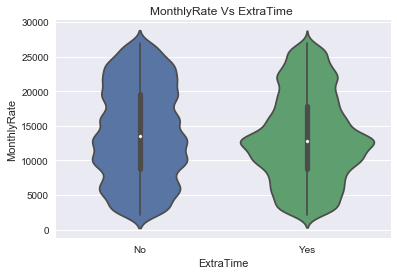

In [344]:
sns.violinplot(train["ExtraTime"],train["MonthlyRate"])
plt.title("MonthlyRate Vs ExtraTime ")
plt.ylabel("MonthlyRate")
plt.xlabel("ExtraTime");

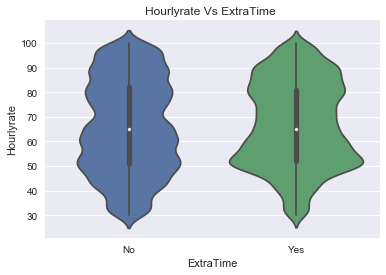

In [345]:
sns.violinplot(train["ExtraTime"],train["Hourlyrate"])
plt.title("Hourlyrate Vs ExtraTime ")
plt.ylabel("Hourlyrate")
plt.xlabel("ExtraTime");

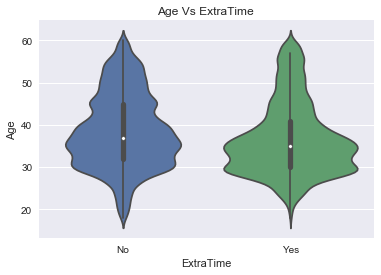

In [346]:
sns.violinplot(train["ExtraTime"],train["Age"])
plt.title("Age Vs ExtraTime ")
plt.ylabel("Age")
plt.xlabel("ExtraTime");

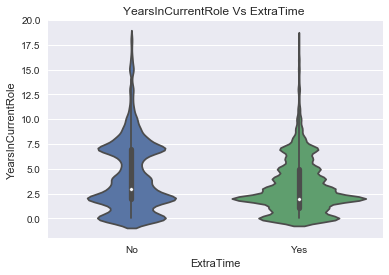

In [347]:
sns.violinplot(train["ExtraTime"],train["YearsInCurrentRole"])
plt.title("YearsInCurrentRole Vs ExtraTime ")
plt.ylabel("YearsInCurrentRole")
plt.xlabel("ExtraTime");

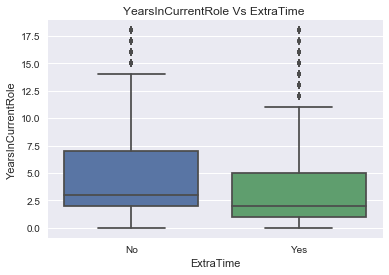

In [348]:
sns.boxplot(train["ExtraTime"],train["YearsInCurrentRole"])
plt.title("YearsInCurrentRole Vs ExtraTime ")
plt.ylabel("YearsInCurrentRole")
plt.xlabel("ExtraTime");

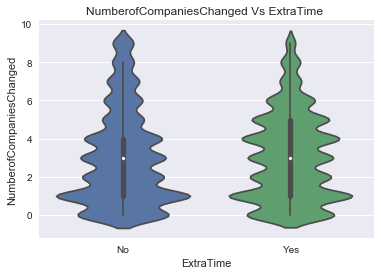

In [349]:
sns.violinplot(train["ExtraTime"],train["NumberofCompaniesChanged"])
plt.title("NumberofCompaniesChanged Vs ExtraTime ")
plt.ylabel("NumberofCompaniesChanged")
plt.xlabel("ExtraTime");

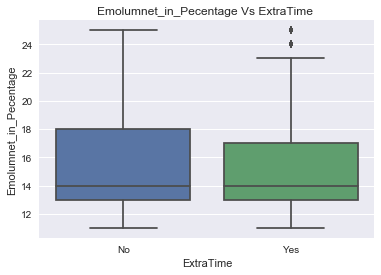

In [350]:
sns.boxplot(train["ExtraTime"],train["Emolumnet_in_Pecentage"])
plt.title("Emolumnet_in_Pecentage Vs ExtraTime ")
plt.ylabel("Emolumnet_in_Pecentage")
plt.xlabel("ExtraTime");

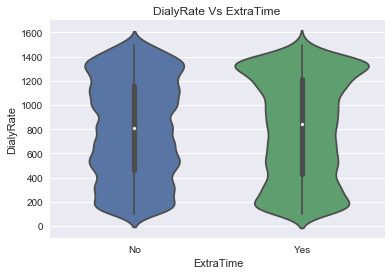

In [351]:
sns.violinplot(train["ExtraTime"],train["DialyRate"])
plt.title("DialyRate Vs ExtraTime ")
plt.ylabel("DialyRate")
plt.xlabel("ExtraTime");

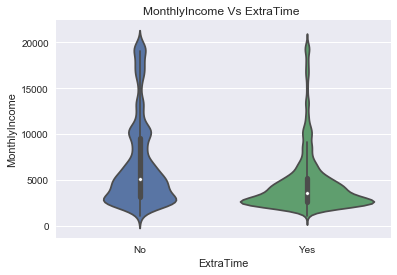

In [352]:
sns.violinplot(train["ExtraTime"],train["MonthlyIncome"])
plt.title("MonthlyIncome Vs ExtraTime ")
plt.ylabel("MonthlyIncome")
plt.xlabel("ExtraTime");

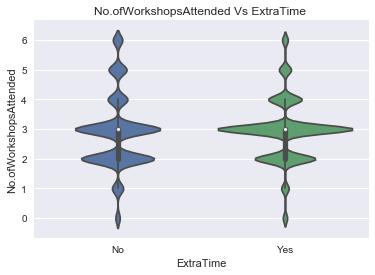

In [353]:
sns.violinplot(train["ExtraTime"],train["No.ofWorkshopsAttended"])
plt.title("No.ofWorkshopsAttended Vs ExtraTime ")
plt.ylabel("No.ofWorkshopsAttended")
plt.xlabel("ExtraTime");

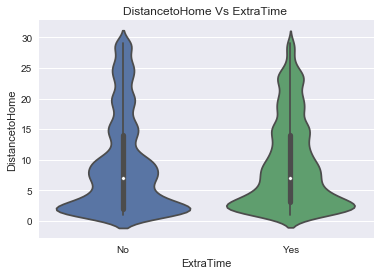

In [354]:
sns.violinplot(train["ExtraTime"],train["DistancetoHome"])
plt.title("DistancetoHome Vs ExtraTime ")
plt.ylabel("DistancetoHome")
plt.xlabel("ExtraTime");

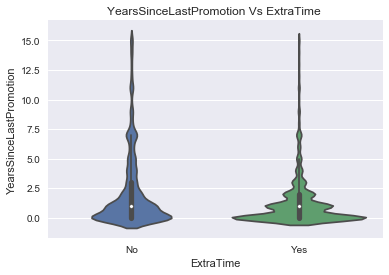

In [355]:
sns.violinplot(train["ExtraTime"],train["YearsSinceLastPromotion"])
plt.title("YearsSinceLastPromotion Vs ExtraTime ")
plt.ylabel("YearsSinceLastPromotion")
plt.xlabel("ExtraTime");

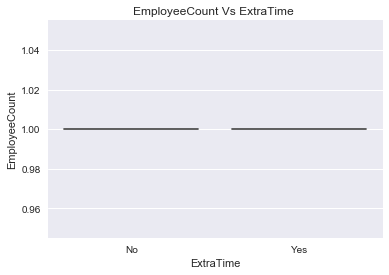

In [356]:
sns.violinplot(train["ExtraTime"],train["EmployeeCount"])
plt.title("EmployeeCount Vs ExtraTime ")
plt.ylabel("EmployeeCount")
plt.xlabel("ExtraTime");

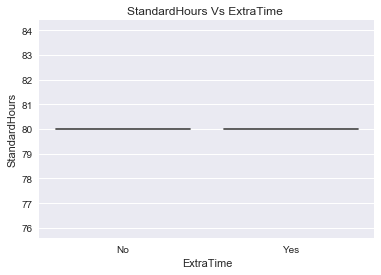

In [357]:
sns.violinplot(train["ExtraTime"],train["StandardHours"])
plt.title("StandardHours Vs ExtraTime ")
plt.ylabel("StandardHours")
plt.xlabel("ExtraTime");

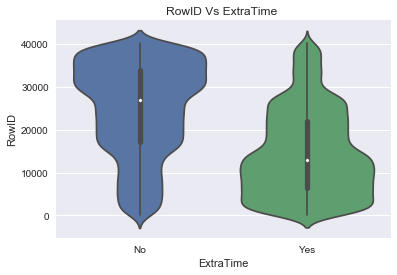

In [358]:
sns.violinplot(train["ExtraTime"],train["RowID"])
plt.title("RowID Vs ExtraTime ")
plt.ylabel("RowID")
plt.xlabel("ExtraTime");

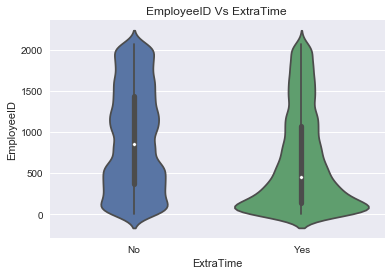

In [359]:
sns.violinplot(train["ExtraTime"],train["EmployeeID"])
plt.title("EmployeeID Vs ExtraTime ")
plt.ylabel("EmployeeID")
plt.xlabel("ExtraTime");

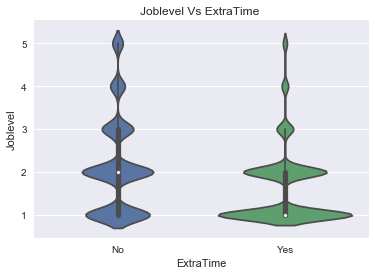

In [360]:
sns.violinplot(train["ExtraTime"],train["Joblevel"])
plt.title("Joblevel Vs ExtraTime ")
plt.ylabel("Joblevel")
plt.xlabel("ExtraTime");

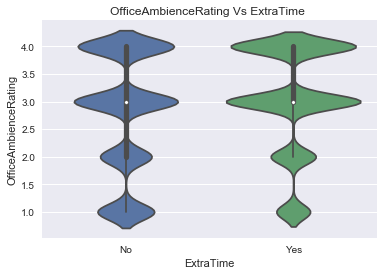

In [361]:
sns.violinplot(train["ExtraTime"],train["OfficeAmbienceRating"])
plt.title("OfficeAmbienceRating Vs ExtraTime ")
plt.ylabel("OfficeAmbienceRating")
plt.xlabel("ExtraTime");

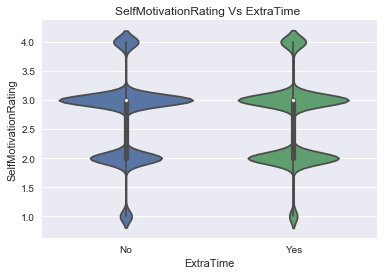

In [362]:
sns.violinplot(train["ExtraTime"],train["SelfMotivationRating"])
plt.title("SelfMotivationRating Vs ExtraTime ")
plt.ylabel("SelfMotivationRating")
plt.xlabel("ExtraTime");

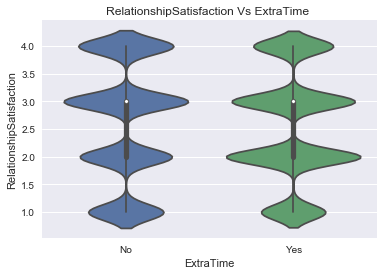

In [363]:
sns.violinplot(train["ExtraTime"],train["RelationshipSatisfaction"])
plt.title("RelationshipSatisfaction Vs ExtraTime ")
plt.ylabel("RelationshipSatisfaction")
plt.xlabel("ExtraTime");

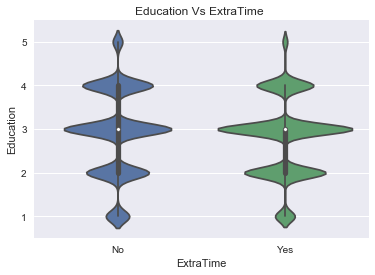

In [364]:
sns.violinplot(train["ExtraTime"],train["Education"])
plt.title("Education Vs ExtraTime ")
plt.ylabel("Education")
plt.xlabel("ExtraTime");

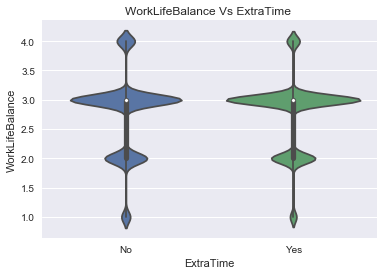

In [365]:
sns.violinplot(train["ExtraTime"],train["WorkLifeBalance"])
plt.title("WorkLifeBalance Vs ExtraTime ")
plt.ylabel("WorkLifeBalance")
plt.xlabel("ExtraTime");

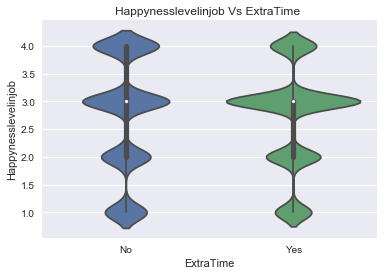

In [366]:
sns.violinplot(train["ExtraTime"],train["Happynesslevelinjob"])
plt.title("Happynesslevelinjob Vs ExtraTime ")
plt.ylabel("Happynesslevelinjob")
plt.xlabel("ExtraTime");

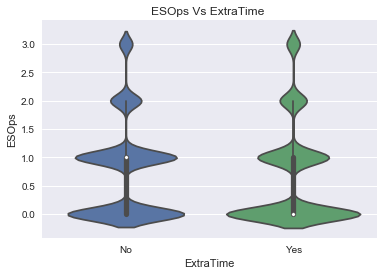

In [367]:
sns.violinplot(train["ExtraTime"],train["ESOps"])
plt.title("ESOps Vs ExtraTime ")
plt.ylabel("ESOps")
plt.xlabel("ExtraTime");

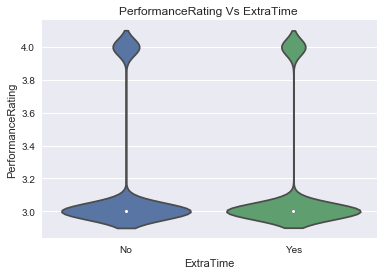

In [368]:
sns.violinplot(train["ExtraTime"],train["PerformanceRating"])
plt.title("PerformanceRating Vs ExtraTime ")
plt.ylabel("PerformanceRating")
plt.xlabel("ExtraTime");

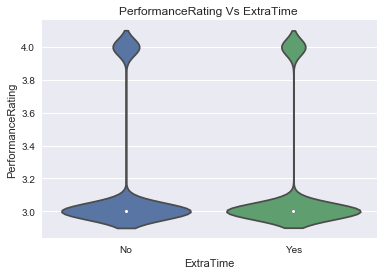

In [369]:
sns.violinplot(train["ExtraTime"],train["PerformanceRating"])
plt.title("PerformanceRating Vs ExtraTime ")
plt.ylabel("PerformanceRating")
plt.xlabel("ExtraTime");

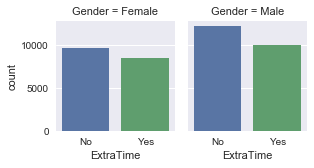

In [370]:
g = sns.factorplot("ExtraTime", col="Gender", col_wrap=4,
                    data=train,
                    kind="count", size=2.5, aspect=.8);

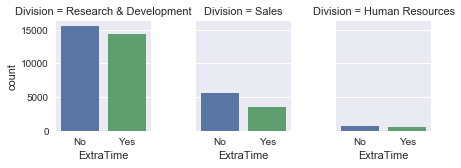

In [371]:
g = sns.factorplot("ExtraTime", col="Division", col_wrap=4,
                    data=train,
                    kind="count", size=2.5, aspect=.8);

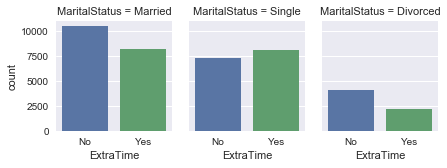

In [372]:
g = sns.factorplot("ExtraTime", col="MaritalStatus", col_wrap=4,
                    data=train,
                    kind="count", size=2.5, aspect=.8);

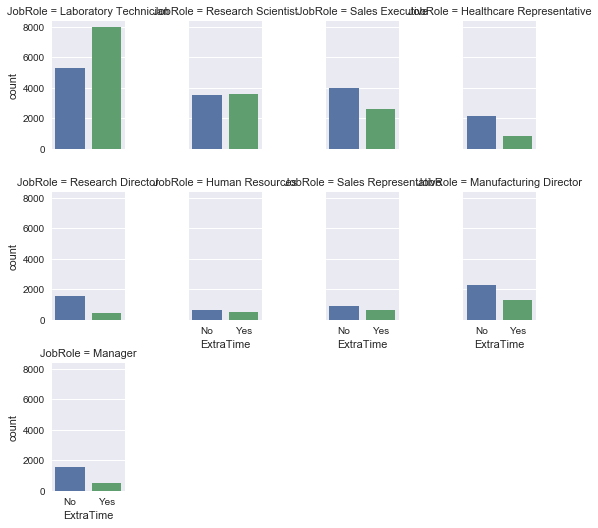

In [373]:
g = sns.factorplot("ExtraTime", col="JobRole", col_wrap=4,
                    data=train,
                    kind="count", size=2.5, aspect=.8);

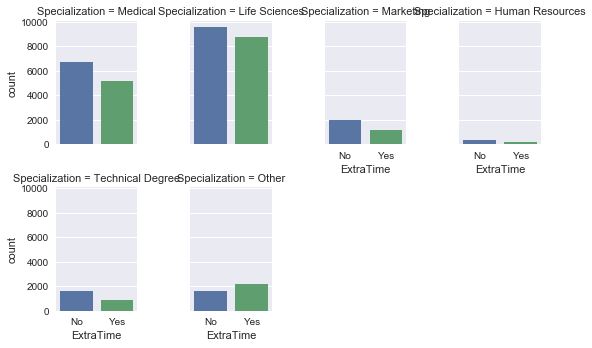

In [374]:
g = sns.factorplot("ExtraTime", col="Specialization", col_wrap=4,
                    data=train,
                    kind="count", size=2.5, aspect=.8);

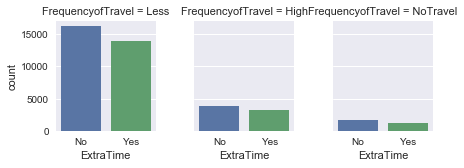

In [375]:
g = sns.factorplot("ExtraTime", col="FrequencyofTravel", col_wrap=4,
                    data=train,
                    kind="count", size=2.5, aspect=.8);

# Feature Engineering & Selection

### Merge both datasets

In [376]:
# create df_full by merging train and test data
df_train = train
df_test = test
df_full = df_train.append(df_test) #, sort=False
print('Shape: ', df_full.shape)

Shape:  (50341, 35)


In [377]:
print('df_full shape: ', df_full.shape)
print('df_train shape: ',df_train.shape)
print('df_test shape: ',df_test.shape)
# print(df_train['Id'].tail())
# print(df_test['Id'].head())
print('Train Min: ', min(df_train['RowID']), 'Max: ', max(df_train['RowID']))
print('Test Min: ', min(df_test['RowID']), 'Max: ',max(df_test['RowID']))
# df_train.equals(df_full.head(len(df_train)))
print(sum(df_full.head(len(df_train))['RowID']>=40304))
print(sum(df_full.tail(len(df_test))['RowID']>=40304))


df_full shape:  (50341, 35)
df_train shape:  (40303, 35)
df_test shape:  (10038, 34)
Train Min:  1 Max:  40303
Test Min:  40304 Max:  50341
0
10038


In [378]:
len(df_train)

40303

In [379]:
# remove target value from the full dataset
df_full = df_full.drop(['ExtraTime'], axis=1)

print('Shape: ', df_full.shape)

Shape:  (50341, 34)


### Creating New Features

In [380]:
def same_columns(x, key):
    return([col for col in x if key in col])
print('Job Cols: ', same_columns(df_full.columns, key = 'Job'))
print('Years Cols: ', same_columns(df_full.columns, key = 'Year'))
# print('Garage Cols: ', same_columns(df_full.columns, key = 'Garage'))
# print('Bsmt Cols: ', same_columns(df_full.columns, key = 'Bsmt'))
# print('Fireplace Cols: ', same_columns(df_full.columns, key = 'Fireplaces'))

Job Cols:  ['FirstJobDate', 'JobRole', 'Joblevel']
Years Cols:  ['YearsInCurrentRole', 'YearsSinceLastPromotion']


In [381]:
df_full['current_comp_exp']=(pd.to_datetime('now') - pd.to_datetime(df_full['DateOfjoiningintheCurrentCompany'])) / np.timedelta64(1, 'Y')
df_full['tot_years_exp']=(pd.to_datetime('now') - pd.to_datetime(df_full['FirstJobDate'])) / np.timedelta64(1, 'Y')

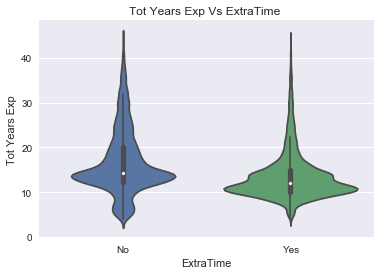

In [382]:
sns.violinplot(train["ExtraTime"],df_full["tot_years_exp"])
plt.title("Tot Years Exp Vs ExtraTime ")
plt.ylabel("Tot Years Exp")
plt.xlabel("ExtraTime");

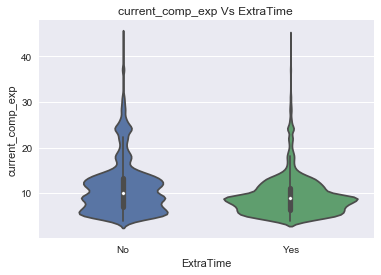

In [383]:
sns.violinplot(train["ExtraTime"],df_full["current_comp_exp"])
plt.title("current_comp_exp Vs ExtraTime ")
plt.ylabel("current_comp_exp")
plt.xlabel("ExtraTime");

### Encoding Ordinal Features

In [384]:
df_full['FrequencyofTravel'].value_counts()

Less        37816
High         8864
NoTravel     3661
Name: FrequencyofTravel, dtype: int64

In [385]:
df_full['FrequencyofTravel'] = df_full['FrequencyofTravel'].replace('NoTravel','0')
df_full['FrequencyofTravel'] = df_full['FrequencyofTravel'].replace('Less','1')
df_full['FrequencyofTravel'] = df_full['FrequencyofTravel'].replace('High','2')
df_full['FrequencyofTravel'].apply(pd.to_numeric)
df_full['FrequencyofTravel'].value_counts()

1    37816
2     8864
0     3661
Name: FrequencyofTravel, dtype: int64

In [386]:
# create a list with all the other ordinal features
ordinal_categories = ['Joblevel', 'OfficeAmbienceRating','SelfMotivationRating','RelationshipSatisfaction','Education',
                      'WorkLifeBalance','Happynesslevelinjob','ESOps','PerformanceRating','FrequencyofTravel',
                      'YearsSinceLastPromotion']

# import encoder library
from sklearn.preprocessing import LabelEncoder

# create a for loop to encode the categorical features
# loop over featues from the list ordinal_categories in the full dataset
for col in df_full[ordinal_categories]:
    # define the encoder instance
    enc = LabelEncoder()
    # create new column as 'OldName_bin' with the encoded values
    df_full[col + '_bin'] = enc.fit_transform(df_full[col].astype(str))

In [387]:
# combine previously encoded features into a list
delete_col = ['Over18', 'EmployeeCount', 'datacollected', 'StandardHours','RowID','EmployeeID']
feature_col = ['FirstJobDate', 'DateOfjoiningintheCurrentCompany']
columns_to_drop = ordinal_categories + delete_col + feature_col

# drop already encoded features & unnecessary columns
df_full.drop(columns_to_drop, axis=1, inplace=True)

# check number of each type of column
df_full.dtypes.value_counts()

int64      21
object      5
float64     2
dtype: int64

In [388]:
from sklearn.utils import resample
df = sub_df
df['balance'] = train_labels
df_majority = df[df.balance=='No']
df_minority = df[df.balance=='Yes']
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=21800,    # to match majority class
                                 random_state=123) # reproducible results
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.balance.value_counts()


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No     21852
Yes    21800
Name: balance, dtype: int64

In [389]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(df_upsampled.drop('balance', axis=1))
X_test_f = sc_X.transform(sub_df_test)
y = df_upsampled.balance

### Encoding Categorical Features

In [390]:
df_full.dtypes.value_counts()

int64      21
object      5
float64     2
dtype: int64

In [391]:
# one-hot encoding of categorical features
df_full = pd.get_dummies(df_full)

print('Full data shape: ', df_full.shape)

Full data shape:  (50341, 46)


### Aligning Train and Test Data

In [392]:
# split the data from df_full back into train and test datasets using the length of df_train


train = df_full.iloc[:len(df_train),:]
test = df_full.iloc[len(df_train):,:]

print('Train shape: ', train.shape)
print('Test shape: ', test.shape)

# extract the labels
train_labels = df_train['ExtraTime']

# align train and test data, keep only columns present in both dataframes
train, test = train.align(test, join = 'inner', axis = 1)

test_f = test
print('Train shape: ', train.shape)
print('Test shape: ', test.shape)

Train shape:  (40303, 46)
Test shape:  (10038, 46)
Train shape:  (40303, 46)
Test shape:  (10038, 46)


In [393]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(train)
X_test = sc_X.transform(test)
y = train_labels
# train = X
# train_labels = y
# y_pred = regressor.predict(6.5)
# y_pred = sc_y.inverse_transform(y_pred)

### Verify Class Imbalance

In [394]:
print(y.value_counts())
import collections
collections.Counter(y)


No     21852
Yes    18451
Name: ExtraTime, dtype: int64


Counter({'No': 21852, 'Yes': 18451})

In [395]:

from sklearn.utils import resample

In [396]:
df = train
df['balance'] = train_labels
df_majority = df[df.balance=='No']
df_minority = df[df.balance=='Yes']
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=21800,    # to match majority class
                                 random_state=123) # reproducible results

In [397]:
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled.balance.value_counts()
train_y = df_upsampled.balance
train_x = df_upsampled.drop('balance', axis=1)

In [398]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(df_upsampled.drop('balance', axis=1))
X_test_f = sc_X.transform(test_f)
y = df_upsampled.balance

*Logistic Regression*
-------------------

In [399]:
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression


test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)
model_lr = LogisticRegression()
model_lr.fit(X, y)
result = model_lr.score(X, y)
print("Accuracy: %.3f%%" % (result*100.0))

Accuracy: 65.541%


In [400]:
test_predictions = model_lr.predict(X_test_f)

In [401]:
y_pred_prob = model_lr.predict_proba(X)[:, 1]
y_pred_prob
y_plot = y.replace('No', 0)
y_plot = y_plot.replace('Yes', 1)


In [402]:
test_predictions.shape
len(X_test_f)

10038

In [403]:
submission = pd.DataFrame({
        "RowID": df_test['RowID'],
        "ExtraTime": test_predictions
    })

submission.to_csv("submission_lm2.csv", index=False)

In [404]:
# Evaluate using Cross Validation
import pandas
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

num_instances = len(X)
seed = 7
kfold = model_selection.KFold(n_splits=5, random_state=seed)
model_lr1 = LogisticRegression()
results = model_selection.cross_val_score(model_lr1, X, y, cv=kfold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 44.390% (13.569%)


### Random Forest

In [307]:
# Random Forest Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier


seed = 7
num_trees = 100
max_features = 3
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.7582163799305158


In [308]:
model.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=3, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

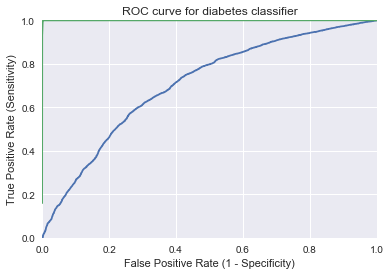

In [329]:
y_pred_prob_lr = model_lr.predict_proba(X)[:, 1]
y_pred_prob_rf = model.predict_proba(X)[:, 1]
# y_pred_prob_svm = classifier.predict_proba(X)[:, 1]
y_plot = y.replace('No', 0)
y_plot = y_plot.replace('Yes', 1)
# IMPORTANT: first argument is true values, second argument is predicted probabilities# IMPORT 
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_plot, y_pred_prob_lr)
plt.plot(fpr, tpr)
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_plot, y_pred_prob_rf)
plt.plot(fpr1, tpr1)
# fpr2, tpr2, thresholds2 = metrics.roc_curve(y_plot, y_pred_prob_svm)
# plt.plot(fpr2, tpr2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [96]:
test_predictions_rf = model.predict(X_test_f)

In [98]:
submission = pd.DataFrame({
        "RowID": df_test['RowID'],
        "ExtraTime": test_predictions_rf
    })

submission.to_csv("submission_rf2.csv", index=False)

### SVM

In [312]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [405]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X, y = y, cv = 5)
accuracies.mean()
accuracies.std()

KeyboardInterrupt: 

In [313]:
test_predictions_svm = classifier.predict(X_test_f)

In [268]:
submission = pd.DataFrame({
    "RowID": df_test['RowID'],
    "ExtraTime": test_predictions_svm
    })

submission.to_csv("submission_svm_sub.csv", index=False)

### AdaBoost

In [67]:
# AdaBoost Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier

seed = 7
num_trees = 30
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model_ada = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_ada, X, y, cv=kfold)
print(results.mean())

0.6806188977724885


In [68]:
model_ada.fit(X, y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=30, random_state=7)

In [69]:
submission = pd.DataFrame({
        "RowID": df_test['RowID'],
        "ExtraTime": model_ada.predict(X_test_f)
    })

submission.to_csv("submission_ada.csv", index=False)

### Stochastic Gradient Boosting

In [282]:
# Stochastic Gradient Boosting Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier

seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model_sgb = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_sgb, X, y, cv=kfold)
print(results.mean())

0.7227947342764747


In [283]:
model_sgb.fit(X, y)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=7, subsample=1.0, verbose=0,
              warm_start=False)

In [284]:
submission = pd.DataFrame({
        "RowID": df_test['RowID'],
        "ExtraTime": model_sgb.predict(X_test_f)
    })

submission.to_csv("submission_sgb.csv", index=False)

### Bagged Decision Trees 

In [61]:
# Bagged Decision Trees for Classification
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = DecisionTreeClassifier()
num_trees = 100
model_bag = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model_bag, X, y, cv=kfold)
print(results.mean())

0.7530845663066525


In [62]:
model_bag.fit(X, y)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=100, n_jobs=1, oob_score=False,
         random_state=7, verbose=0, warm_start=False)

In [63]:
submission = pd.DataFrame({
        "RowID": df_test['RowID'],
        "ExtraTime": model_bag.predict(X_test_f)
    })

submission.to_csv("submission_bag.csv", index=False)

In [ ]:
### Tried manual selection by using plots

In [253]:
sub_df_full = df_full[['YearsInCurrentRole', 'Emolumnet_in_Pecentage', 'DialyRate' , 'MonthlyIncome','YearsSinceLastPromotion_bin',
         'Gender', 'Division', 'MaritalStatus','JobRole', 'Specialization', 
         'tot_years_exp', 'current_comp_exp','FrequencyofTravel_bin' ]]
sub_df_full = pd.get_dummies(sub_df_full)

In [255]:

sub_df_full = df_full[['YearsInCurrentRole', 'Emolumnet_in_Pecentage', 'DialyRate' , 'MonthlyIncome','YearsSinceLastPromotion_bin',
         'Gender', 'Division', 'MaritalStatus','JobRole', 'Specialization', 
         'tot_years_exp', 'current_comp_exp','FrequencyofTravel_bin' ]]


sub_df_full = pd.get_dummies(sub_df_full)
sub_df = sub_df_full.iloc[:len(df_train),:]
sub_df_test = sub_df_full.iloc[len(df_train):,:]

sub_df['RowID'] = train['RowID']
sub_df_test['RowID'] = test['RowID']



train_labels = df_train['ExtraTime']
print('train data shape: ', sub_df.shape)
print('test data shape: ', sub_df_test.shape)



train data shape:  (40303, 32)
test data shape:  (10038, 32)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
